In [1]:
from sympy import *
b, c, TA, TB, α1, α2, p, w, p1, p2, p3, p4, x, y, v, ε = symbols('b c TA TB α1, α2 p, w, p1, p2, p3, p4, x, y, v, ε')

In [2]:
#p = (c*(1-TB) - b*α1*TA-(TA-TB))/(b*(1-α1)*(TA-TB)) # equation 20
w = 1 + p*(b-c) # mean fitness


In [3]:
# changing p' in eq8 with p3'
eq8 = (p3+p1)*p3*(α2+(1-α2)*(p1+p3+(p2+p4)*(1-TB)))
eq8 += (p2+p4)*p3*(α2*(1-TB)+(1-α2)*(p1+p3+(p2+p4)*(1-TB)))
eq8 += (p1+p3)*p4*(α2*TA+(1-α2)*((p1+p3)*TA))
eq8 += (p2+p4)*p4*((1-α2)*(p1+p3)*TA)
simplify(eq8)

-TA*p4*(p1 + p3)*(p2 + p4)*(α2 - 1) + TA*p4*(p1 + p3)*(α2 - (p1 + p3)*(α2 - 1)) + p3*(p1 + p3)*(α2 - (α2 - 1)*(p1 + p3 - (TB - 1)*(p2 + p4))) - p3*(p2 + p4)*(α2*(TB - 1) + (α2 - 1)*(p1 + p3 - (TB - 1)*(p2 + p4)))

In [9]:
## ignore

eq8 = (x)*p3*(α2+(1-α2)*(x+(1-x)*(1-TB)))
eq8 += (1-x)*p3*(α2*(1-TB)+(1-α2)*(x+(1-x)*(1-TB)))
eq8 += (x)*p4*(α2*TA+(1-α2)*((x)*TA))
eq8 += (1-x)*p4*((1-α2)*(x)*TA)
simplify(eq8)

TA*p4*x + TB*p3*x - TB*p3 + p3

In [4]:
deq8dp3 = diff(eq8, p3)
deq8dp3 = deq8dp3.subs(p3,0)
deq8dp3 = deq8dp3.subs(p4,0)
deq8dp3 = deq8dp3.subs(p1,p)
deq8dp3 = deq8dp3.subs(p2,1-p)
simplify(deq8dp3)



TB*p - TB + 1

In [5]:
deq8dp4 = diff(eq8, p4)
deq8dp4 = deq8dp4.subs(p3,0)
deq8dp4 = deq8dp4.subs(p4,0)
deq8dp4 = deq8dp4.subs(p1,p)
deq8dp4 = deq8dp4.subs(p2,1-p)
simplify(deq8dp4)

TA*p

# $\partial\bar{w} \tilde{p}_3' / \partial \tilde{p}_3$

In [6]:
dp3p3 = v*(b*(p-(1-α2)*TB*(p-p**2))+(1-c)*(1+p*TB-TB))+w*(1-v)*(TB*p-TB+1) # from equation 45
dp3p3 =simplify(dp3p3)
dp3p3

-v*(b*p*(TB*(p - 1)*(α2 - 1) - 1) + (c - 1)*(TB*p - TB + 1)) - (v - 1)*(p*(b - c) + 1)*(TB*p - TB + 1)

In [7]:
### For sanity check - let sympy derive w*p3' by p3 and substitude p*, 1-p*, 0 ,0
wp3 = v*p3*(p1+p3)*(1+b-c)*(1-(1-α2)*(p2+p4)*TB)
wp3 += v*p3*(p2+p4)*(1-c)*(1-α2*TB*(p1+p3)-TB*(p2+p4))
wp3 += v*p4*(p1+p3)*(1+b)*TA*(p1+p3+α2*(p2+p4))
wp3 += v*p4*(p2+p4)*(p1+p3)*(1-α2)*TA
wp3 += w*(1-v)*eq8
dfp3dp3 = diff(wp3, p3)
dfp3dp3 = dfp3dp3.subs(p3, 0)
dfp3dp3 = dfp3dp3.subs(p4, 0)
dfp3dp3 = dfp3dp3.subs(p1, p)
dfp3dp3 = dfp3dp3.subs(p2, 1-p)
### Sanity check - should be 0
simplify(dp3p3-dfp3dp3)

0

# $\partial \bar{w} \tilde{p}_3' / \partial \tilde{p}_4$

In [8]:
dp3p4 = v*b*TA*p*(p+α2*(1-p)) + v*p*TA+w*(1-v)*p*TA # from equation 45
dp3p4 = simplify(dp3p4)
dp3p4

TA*p*(b*v*(p - α2*(p - 1)) + v - (v - 1)*(p*(b - c) + 1))

In [9]:
### For sanity check - let sympy derive w*p3' by p4 and substitude p*, 1-p*, 0 ,0

dfp3dp4 = diff(wp3, p4)
dfp3dp4 = dfp3dp4.subs(p3, 0)
dfp3dp4 = dfp3dp4.subs(p4, 0)
dfp3dp4 = dfp3dp4.subs(p1, p)
dfp3dp4 = dfp3dp4.subs(p2, 1-p)
### Sanity check - should be 0
simplify(dp3p4-dfp3dp4)

0

# $\partial \bar{w} \tilde{p}_4' / \partial \tilde{p}_3$

In [10]:
# changing p' in eq8 with p4'
eq8_4 = (p4+p2)*p4*(α2+(1-α2)*(p2+p4+(p1+p3)*(1-TA)))
eq8_4 += (p3+p1)*p4*(α2*(1-TA)+(1-α2)*(p2+p4+(p1+p3)*(1-TA)))
eq8_4 += (p2+p4)*p3*(α2*TB+(1-α2)*((p2+p4)*TB))
eq8_4 += (p1+p3)*p3*((1-α2)*(p2+p4)*TB)
simplify(eq8_4)

-TB*p3*(p1 + p3)*(p2 + p4)*(α2 - 1) + TB*p3*(p2 + p4)*(α2 - (p2 + p4)*(α2 - 1)) - p4*(p1 + p3)*(α2*(TA - 1) + (α2 - 1)*(p2 + p4 - (TA - 1)*(p1 + p3))) + p4*(p2 + p4)*(α2 - (α2 - 1)*(p2 + p4 - (TA - 1)*(p1 + p3)))

In [11]:
deq8_4_dp3 = diff(eq8_4, p3)
deq8_4_dp3 = deq8_4_dp3.subs(p3,0)
deq8_4_dp3 = deq8_4_dp3.subs(p4,0)
deq8_4_dp3 = deq8_4_dp3.subs(p1,p)
deq8_4_dp3 = deq8_4_dp3.subs(p2,1-p)
simplify(deq8_4_dp3)

TB*(1 - p)

In [12]:
deq8_4_dp4 = diff(eq8_4, p4)
ddeq8_4_dp4= deq8_4_dp4.subs(p3,0)
ddeq8_4_dp4 = ddeq8_4_dp4.subs(p4,0)
ddeq8_4_dp4 = ddeq8_4_dp4.subs(p1,p)
ddeq8_4_dp4 = ddeq8_4_dp4.subs(p2,1-p)
simplify(ddeq8_4_dp4)

-TA*p + 1

In [13]:
dp4p3 = v*((1-p)*(1-c)*TB+b*p*(1-α2)*(1-p)*TB)+(1-v)*w*TB*(1-p)
dp4p3 = simplify(dp4p3)
dp4p3

TB*(p - 1)*(v*(b*p*(α2 - 1) + c - 1) + (v - 1)*(p*(b - c) + 1))

In [14]:
### For sanity check - let sympy derive w*p4' by p3 and substitude p*, 1-p*, 0 ,0

wp4 = v*(p4*(p2+p4)*(1-(1-α2)*(p1+p3)*TA))
wp4 += v*(p4*(p1+p3)*(1+b)*(1-α2*TA*(p2+p4)-TA*(p1+p3)))
wp4 += v*(p3*(p2+p4)*(1-c)*(α2*TB+(1-α2)*(p2+p4)*TB))
wp4 += v*(p3*(p1+p3)*(1+b-c)*(1-α2)*(p2+p4)*TB)
wp4 += (1-v)*w*eq8_4

dfp4dp3 = diff(wp4, p3)
dfp4dp3 = dfp4dp3.subs(p3, 0)
dfp4dp3 = dfp4dp3.subs(p4, 0)
dfp4dp3 = dfp4dp3.subs(p1, p)
dfp4dp3 = dfp4dp3.subs(p2, 1-p)
### Sanity check - should be 0
simplify(dp4p3-dfp4dp3)

0

# $\partial \bar{w} \tilde{p}_4' / \partial \tilde{p}_4$

In [15]:
dp4p4 = v*(1-p*TA+b*p*(1-α2*TA*(1-p)-TA*p)) + (1-v)*w*(-TA*p+1)
dp4p3 = simplify(dp4p3)
dp4p3

TB*(p - 1)*(v*(b*p*(α2 - 1) + c - 1) + (v - 1)*(p*(b - c) + 1))

In [16]:
### For sanity check - let sympy derive w*p4' by p4 and substitude p*, 1-p*, 0 ,0
dfp4dp4 = diff(wp4, p4)
dfp4dp4 = dfp4dp4.subs(p3, 0)
dfp4dp4 = dfp4dp4.subs(p4, 0)
dfp4dp4 = dfp4dp4.subs(p1, p)
dfp4dp4 = dfp4dp4.subs(p2, 1-p)
### Sanity check - should be 0
simplify(dp4p4-dfp4dp4)

0

# Find the eigenvalues 
We will mark the eigenvalues in x and solve the typical polynomial equation.

In [17]:
dp4p4 = simplify(dfp4dp4/w)
dp3p3 = simplify(dfp3dp3/w)
dp3p4 = simplify(dfp3dp4/w)
dp4p3 = simplify(dfp4dp3/w)

dp3p4dp4p3 = dp4p3*dp3p4
dp3p4dp4p3 = simplify(dp3p4dp4p3)

## polynomial 
# λ^2 + a2*λ + a3

a3 = simplify(-dp3p4dp4p3 + dp3p3*dp4p4)
a2 = simplify(-dp3p3 - dp4p4)
a3


-(TA*TB*p*(p - 1)*(p*v*(α2 - 1)*(b - c + 1) + v*(c - 1)*(α2 + (p - 1)*(α2 - 1)) + (v - 1)*(p*(b - c) + 1)*(-p*(α2 - 1) + α2 + (p - 1)*(α2 - 1)))*(-b*p*v*α2 + b*p + b*v*α2 + c*p*v - c*p + 1) + (p*v*(TB*(p - 1)*(α2 - 1) - 1)*(b - c + 1) - v*(c - 1)*(p - 1)*(-TB*p*α2 + TB*(p - 1) + 1) + (v - 1)*(p*(b - c) + 1)*(p*(α2 - (p + (TB - 1)*(p - 1))*(α2 - 1)) + (p - 1)*(α2*(TB - 1) + (p + (TB - 1)*(p - 1))*(α2 - 1))))*(TA*b*p**2*v*α2 - TA*b*p**2 - TA*b*p*v*α2 - TA*c*p**2*v + TA*c*p**2 - TA*p + b*p + c*p*v - c*p + 1))/((p*(b - c) + 1)*(b*p - c*p + 1))

In [36]:
lamda = (-a2 + (a2**2-4*a3)**0.5)/2
lamda = lamda.subs(α2, α1+ε)
lamda_diff = diff(lamda, ε)
lamda_diff_epsilon_0 = lamda_diff.subs(ε, 0)
lamda_diff_epsilon_0 = lamda_diff_epsilon_0.subs(p, (α1*b*v*TA-c*v*(1-TB) + TA-TB)/((c*(1-v)-b*(1-α1*v))*(TA-TB)))
lamda_diff_epsilon_0

#lamda_diff_epsilon_0 = lamda_diff_epsilon_0.subs(TA, 0.5)
#lamda_diff_epsilon_0 = lamda_diff_epsilon_0.subs(TB, 0.7)
#lamda_diff_epsilon_0 = lamda_diff_epsilon_0.subs(c, 0.5)
#lamda_diff_epsilon_0 = lamda_diff_epsilon_0.subs(b, 2)
#lamda_diff_epsilon_0 = lamda_diff_epsilon_0.subs(α1, 0.5)




#simplify(lamda_diff_epsilon_0)

((TA*b*v*α1*(TA*b*v*α1 + TA - TB - c*v*(1 - TB))/((TA - TB)*(-b*(-v*α1 + 1) + c*(1 - v))) - TA*b*v*α1*(TA*b*v*α1 + TA - TB - c*v*(1 - TB))**2/((TA - TB)**2*(-b*(-v*α1 + 1) + c*(1 - v))**2) + TA*b*(TA*b*v*α1 + TA - TB - c*v*(1 - TB))**2/((TA - TB)**2*(-b*(-v*α1 + 1) + c*(1 - v))**2) + TA*c*v*(TA*b*v*α1 + TA - TB - c*v*(1 - TB))**2/((TA - TB)**2*(-b*(-v*α1 + 1) + c*(1 - v))**2) - TA*c*(TA*b*v*α1 + TA - TB - c*v*(1 - TB))**2/((TA - TB)**2*(-b*(-v*α1 + 1) + c*(1 - v))**2) + TA*(TA*b*v*α1 + TA - TB - c*v*(1 - TB))/((TA - TB)*(-b*(-v*α1 + 1) + c*(1 - v))) - TB*b*v*α1*(TA*b*v*α1 + TA - TB - c*v*(1 - TB))/((TA - TB)*(-b*(-v*α1 + 1) + c*(1 - v))) + TB*b*v*α1*(TA*b*v*α1 + TA - TB - c*v*(1 - TB))**2/((TA - TB)**2*(-b*(-v*α1 + 1) + c*(1 - v))**2) + TB*b*(TA*b*v*α1 + TA - TB - c*v*(1 - TB))/((TA - TB)*(-b*(-v*α1 + 1) + c*(1 - v))) - TB*b*(TA*b*v*α1 + TA - TB - c*v*(1 - TB))**2/((TA - TB)**2*(-b*(-v*α1 + 1) + c*(1 - v))**2) - TB*c*v + 2*TB*c*v*(TA*b*v*α1 + TA - TB - c*v*(1 - TB))/((TA - TB)*(-b*(-v*

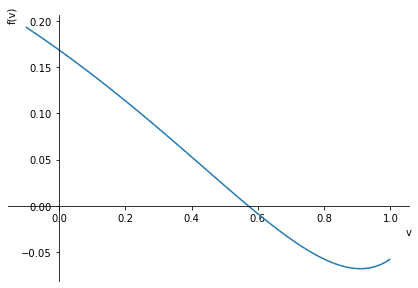

In [57]:
from sympy.plotting import plot

plot(lamda_diff_epsilon_0,(v, -0.1 ,1))


In [27]:
### find value of v in which the derivative is equal to zero
simplify(lamda_diff_epsilon_0.subs(v, 0.5715))
#solve(lamda_diff_epsilon_0, v, simplify=False)

-2.13898537451228e-5

In [129]:
a2_limit = (c*v*(1-TB)-(TA-TB))/(b*v*TA)
a2_limit = a2_limit.subs(c, 0.5)
a2_limit = a2_limit.subs(TA, 0.5)
a2_limit = a2_limit.subs(TB, 0.7)
a2_limit = a2_limit.subs(b, 2)
a2_limit.subs(v, 0.5715)
### this means that the derivative is equal to zero when at the border between coexistance and defection

0.499956255468066

In [31]:
value_at_1 = 1 +a2 +a3
value_at_1 = simplify(value_at_1)
value_at_1



c*p*v*(TA*b*p**2*v*α2 - TA*b*p**2 - 2*TA*b*p*v*α2 + TA*b*p + TA*b*v*α2 - TA*c*p**2*v + TA*c*p**2 + TA*c*p*v - TA*c*p - TA*p + TA - TB*b*p**2*v*α2 + TB*b*p**2 + TB*b*p*v*α2 - TB*b*p + TB*c*p**2*v - TB*c*p**2 - 2*TB*c*p*v + TB*c*p + TB*c*v + TB*p - TB + c*p*v - c*v)/(b**2*p**2 - 2*b*c*p**2 + 2*b*p + c**2*p**2 - 2*c*p + 1)

In [25]:
value_at_1 = value_at_1.subs(α2, α1+ε)
value_at_1_diff = diff(value_at_1, ε)
value_at_1_diff

c*p*v*(TA*b*p**2*v - 2*TA*b*p*v + TA*b*v - TB*b*p**2*v + TB*b*p*v)/(b**2*p**2 - 2*b*c*p**2 + 2*b*p + c**2*p**2 - 2*c*p + 1)

In [26]:
simplify(value_at_1_diff.subs(ε , 0))

b*c*p*v**2*(TA*p**2 - 2*TA*p + TA - TB*p**2 + TB*p)/(b**2*p**2 - 2*b*c*p**2 + 2*b*p + c**2*p**2 - 2*c*p + 1)

In [43]:
numerator_value_1 = fraction(value_at_1)[0]
paaa = poly(numerator_value_1/(c*p*v), α2)
pa = -simplify(paaa.coeffs()[1] / paaa.coeffs()[0])
pa = pa.subs(p, (α1*b*v*TA-c*v*(1-TB) + TA-TB)/((c*(1-v)-b*(1-α1*v))*(TA-TB)))
simplify(pa)

α1

In [64]:
## P star at alpha1 = a2

((α1*b*v*TA-c*v*(1-TB) + TA-TB)/((c*(1-v)-b*(1-α1*v))*(TA-TB))).subs(α1,(c*v*(1-TB)-(TA-TB))/(b*v*TA))

lamda = (-a2 + (a2**2-4*a3)**0.5)/2
lamda = lamda.subs(α2, α1+ε)
lamda_diff = diff(lamda, ε)
lamda_diff_epsilon_0 = lamda_diff.subs(ε, 0)
lamda_diff_epsilon_0 = lamda_diff_epsilon_0.subs(p, (α1*b*v*TA-c*v*(1-TB) + TA-TB)/((c*(1-v)-b*(1-α1*v))*(TA-TB)))
simplify(lamda_diff_epsilon_0)

In [49]:
vvv = 2+a2
vvv = vvv.subs(p,(α1*b*v*TA-c*v*(1-TB) + TA-TB)/((c*(1-v)-b*(1-α1*v))*(TA-TB)))

simplify(diff(vvv, v))

(-(b - c)*(-b*(v*α1 - 1) + c*(v - 1))*((b*α1 - c)*(TA*b*v*α1 + TA - TB + c*v*(TB - 1)) + (-b*(v*α1 - 1) + c*(v - 1))*(TA*b*α1 + c*(TB - 1)))*((TA - TB)**2*(b*(v*α1 - 1) - c*(v - 1))**2*(TB*c*v - TB - c*v + 2) + (TA - TB)*(b*(v*α1 - 1) - c*(v - 1))*(TA*b*v*α1 + TA - TB + c*v*(TB - 1))*(-TA*b*v*α2 - TA + TB*b*v*α2 - TB*b - 2*TB*c*v + TB*c + TB + 2*b + 2*c*v - 2*c) + (TA*b*v*α1 + TA - TB + c*v*(TB - 1))**2*(TA*b*v*α2 - TA*b - TA*c*v + TA*c - TB*b*v*α2 + TB*b + TB*c*v - TB*c)) + (b*(v*α1 - 1) - c*(v - 1))*(b*(TA*b*v*α1 + TA - TB + c*v*(TB - 1)) - c*(TA*b*v*α1 + TA - TB + c*v*(TB - 1)) + (TA - TB)*(b*(v*α1 - 1) - c*(v - 1)))*(c*(TA - TB)**2*(TB - 1)*(b*(v*α1 - 1) - c*(v - 1))**3 + (TA - TB)*(b*α1 - c)*(b*(v*α1 - 1) - c*(v - 1))*(TA*b*v*α1 + TA - TB + c*v*(TB - 1))*(TA*b*v*α2 + TA - TB*b*v*α2 + TB*b + 2*TB*c*v - TB*c - TB - 2*b - 2*c*v + 2*c) + (TA - TB)*(b*(v*α1 - 1) - c*(v - 1))**2*(-TA*b*v*α2*(TA*b*α1 + c*(TB - 1)) - TA*b*α2*(TA*b*v*α1 + TA - TB + c*v*(TB - 1)) - TA*(TA*b*α1 + c*(TB - 1))

In [63]:
result = -e/d
result = simplify(result)
simplify(result.subs(p, (c*(1-TB) - b*α1*TA-(TA-TB))/(b*(1-α1)*(TA-TB))))

α1

In [176]:
# checking the slope at 1:

slope = a2+2
slope_numerator = simplify(slope*(p*(b-c)+1))
slope_poly=poly(slope_numerator, c)
# slope = h*c + g
g = slope_poly.coeffs()[1]
h =slope_poly.coeffs()[0]

#sanity_check:
g1 = TA*b*(p**2)*(1-α2)+TA*p+TB*b*p*(1-α2)*(1-p)+TB*(1-p) + TA*b*p*α2
simplify(g1-g)

0

In [204]:
gh = simplify(-g/h)
gh

(TA*b*p**2*α2 - TA*b*p**2 - TA*b*p*α2 - TA*p - TB*b*p**2*α2 + TB*b*p**2 + TB*b*p*α2 - TB*b*p + TB*p - TB)/(TB*p - TB - 2*p + 1)

In [183]:
h_e = TB*p-TB-2*p+1
h_e = simplify(h_e.subs(p, (c*(1-TB) - b*α1*TA-(TA-TB))/(b*(1-α1)*(TA-TB))))


(-2*TA*b*α1 - 2*TA + TB*(TA*b*α1 + TA - TB + c*(TB - 1)) + 2*TB + b*(1 - TB)*(TA - TB)*(α1 - 1) - 2*c*(TB - 1))/(b*(TA - TB)*(α1 - 1))

In [218]:
slope = a2+2
slope_numerator = simplify(slope*(p*(b-c)+1))
slope_poly2=poly(slope_numerator, α2)
# slope = h*α2 + g
g = slope_poly2.coeffs()[1]
h =slope_poly2.coeffs()[0]

t = -g/h
simplify(t.subs(p, (c*(1-TB) - b*α1*TA-(TA-TB))/(b*(1-α1)*(TA-TB))))

(TA - TB)*(-TB*b*(α1 - 1)*(TA*b*α1 + TA - TB - c*(1 - TB)) + b*(TA - TB)*(α1 - 1)**2*(TB*c - TB - c) - (α1 - 1)*(TA + TB*c - TB - 2*c)*(TA*b*α1 + TA - TB - c*(1 - TB)) - (TA*b*α1 + TA - TB - c*(1 - TB))**2)/((b*(TA - TB)**2*(α1 - 1) + (-TA + TB)*(TA*b*α1 + TA - TB + c*(TB - 1)))*(TA*b*α1 + TA - TB + c*(TB - 1)))